# Per Changeset Analysis

Creates a Pandas DataFrame where each row represents aggregate totals for one changeset.

In [33]:
import datetime, calendar, time, sys
import pandas as pd; import numpy as np; import seaborn as sns
import matplotlib.pyplot as plt; import matplotlib.dates as mdates; import matplotlib.colors as colors; import matplotlib.ticker
%matplotlib inline

In [34]:
PLACE = "detroit_michigan"

Read in the versions file

In [35]:
# Set the columns for the DF
header = ['user',"changeset","road_km_added","road_km_modified","waterway_km_added","waterway_km_modified","roads_added","roads_modified","waterways_added","waterways_modified","buildings_added","buildings_modified","parking_aisle_km_added","parking_aisle_km_modified","parking_aisles_added","parking_aisles_modified","service_road_km_added","service_road_km_modified","service_roads_added","service_roads_modified","driveway_km_added","driveway_km_modified","driveways_added","driveways_modified","sidewalk_km_added","sidewalk_km_modified","sidewalks_added","sidewalks_modified","lane_km_added","lane_km_modified","lanes_added","lanes_modified","cycleway_km_added","cycleway_km_modified","cycleways_added","cycleways_modified","traffic_signs_added","traffic_signs_modified","traffic_signals_added","traffic_signals_modified","manholes_added","manholes_modified","flagpoles_added","flagpoles_modified","bollards_added","bollards_modified","surveillance_added","surveillance_modified","vending_machines_added","vending_machines_modified","pois_added","pois_modified","parks_added","parks_modified","addresses_added","addresses_modified","parking_added","parking_modified","swimming_pools_added","swimming_pools_modified","barriers_added","barriers_modified","bike_parking_added","bike_parking_modified","shelters_added","shelters_modified","crossings_added","crossings_modified"]

In [36]:
df = pd.read_csv('../data/changeset_stats-'+PLACE+'-20180930.csv',names=header, sep=',',index_col=False)
df.set_index('changeset',inplace=True)
df.sort_index(inplace=True)
df['url'] = df.apply(lambda x: "http://openstreetmap.org/changeset/{}".format(x.name),axis=1)
df.head()

,user,road_km_added,road_km_modified,waterway_km_added,waterway_km_modified,roads_added,roads_modified,waterways_added,waterways_modified,buildings_added,...,swimming_pools_modified,barriers_added,barriers_modified,bike_parking_added,bike_parking_modified,shelters_added,shelters_modified,crossings_added,crossings_modified,url
changeset,,,,,,,,,,,,,,,,,,,,,
3127,29399,4.930043,0.011246,0.0,0.0,16,13,0,0,0,...,0,0,0,0,0,0,0,0,0,http://openstreetmap.org/changeset/3127
3677,6993,0.000000,0.540791,0.0,0.0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,http://openstreetmap.org/changeset/3677
3810,6993,0.000000,0.000000,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://openstreetmap.org/changeset/3810
4482,6993,1.617707,0.000000,0.0,0.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://openstreetmap.org/changeset/4482
4522,6993,0.000000,0.000000,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,http://openstreetmap.org/changeset/4522


In [37]:
# Overview stats
sys.stderr.write("Found {:,} changesets by {:,} users".format( len(df), df.user.nunique() ))

Found 87,824 changesets by 3,346 users

# 1. Kilometers of roads added vs. edited over time

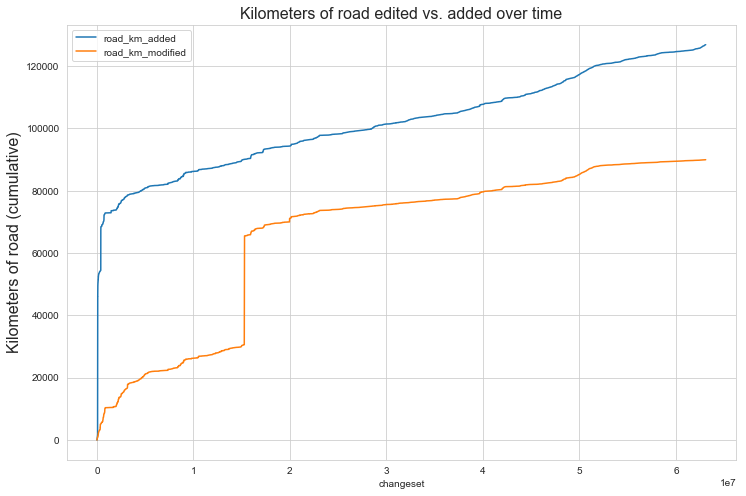

In [38]:
sns.set_style('whitegrid')
ax = df[['road_km_added','road_km_modified']].cumsum().plot(figsize=(12,8))
ax.set_ylabel("Kilometers of road (cumulative)",fontsize=16)
ax.set_title("Kilometers of road edited vs. added over time",fontsize=16);

### Non cumulative gives us a bit of a better "pulse" on the editing per changeset

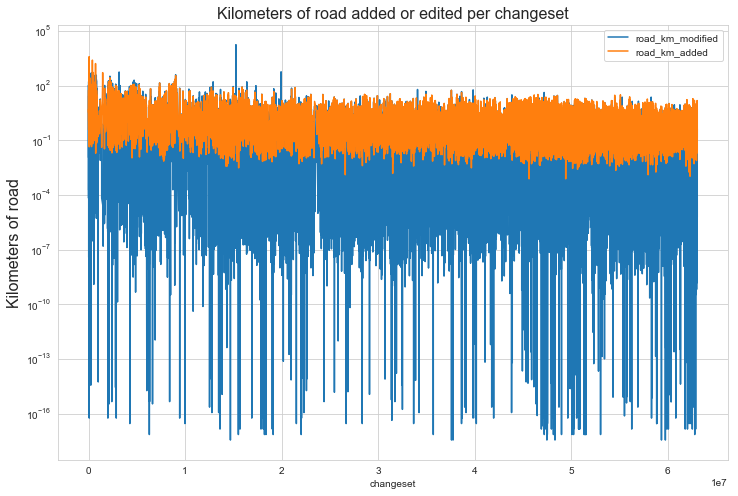

In [39]:
sns.set_style('whitegrid')
df_slice = df[['road_km_added','road_km_modified']]
ax = df_slice[df_slice.road_km_modified>0][['road_km_modified']].plot(figsize=(12,8), logy=True)
df_slice[df_slice.road_km_added>0][['road_km_added']].plot(figsize=(12,8), logy=True, ax=ax)
ax.set_ylabel("Kilometers of road",fontsize=16)
ax.set_title("Kilometers of road added or edited per changeset",fontsize=16);

# 2 Buildings per changeset

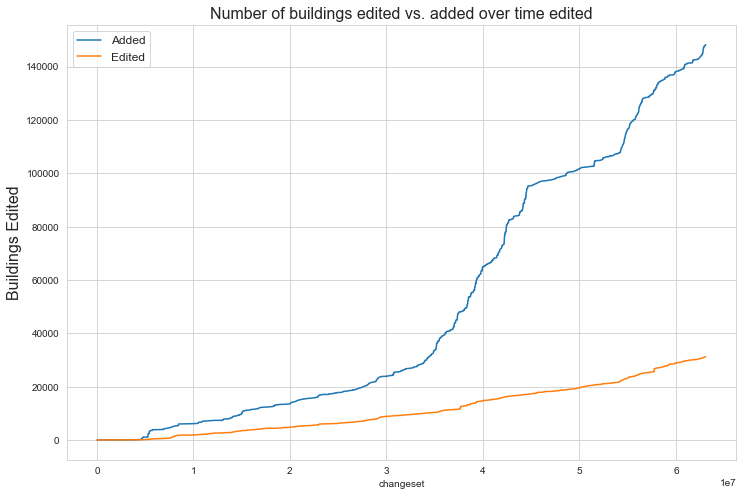

In [40]:
sns.set_style('whitegrid')
ax = df[['buildings_added','buildings_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Buildings Edited",fontsize=16)
ax.set_title("Number of buildings edited vs. added over time edited",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 3 What about POIs?

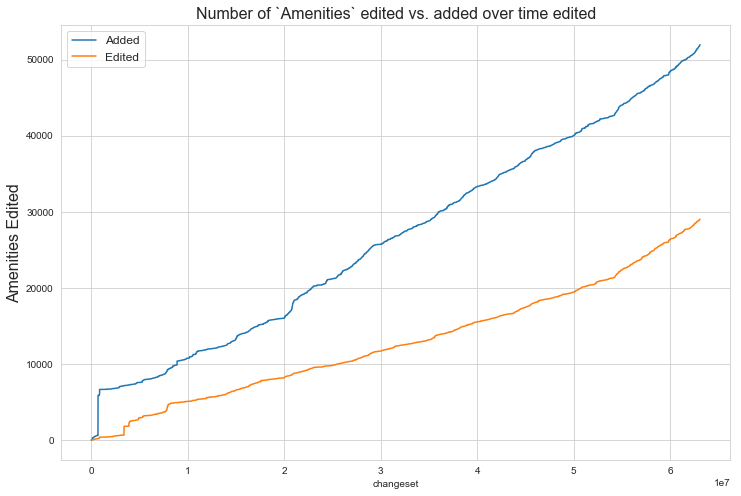

In [41]:
sns.set_style('whitegrid')
ax = df[['pois_added','pois_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Amenities Edited",fontsize=16)
ax.set_title("Number of `Amenities` edited vs. added over time edited",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 4. Parks

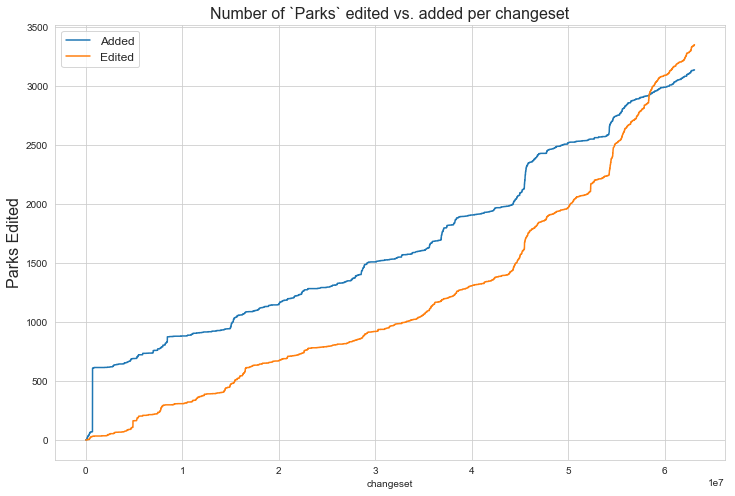

In [42]:
sns.set_style('whitegrid')
ax = df[['parks_added','parks_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Parks Edited",fontsize=16)
ax.set_title("Number of `Parks` edited vs. added per changeset",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 5. Identify some of the top contributions in the area

In [43]:
def top_contributions_for(column):
    return df.sort_values(by=column,ascending=False)[[column,'url']].head()

In [44]:
top_contributions_for('parks_added')

,parks_added,url
changeset,,
698464,538,http://openstreetmap.org/changeset/698464
8451248,21,http://openstreetmap.org/changeset/8451248
54259878,15,http://openstreetmap.org/changeset/54259878
36848643,15,http://openstreetmap.org/changeset/36848643
22362919,13,http://openstreetmap.org/changeset/22362919


In [45]:
top_contributions_for('swimming_pools_added')

,swimming_pools_added,url
changeset,,
57704948,41,http://openstreetmap.org/changeset/57704948
62671439,31,http://openstreetmap.org/changeset/62671439
61726595,25,http://openstreetmap.org/changeset/61726595
54449115,23,http://openstreetmap.org/changeset/54449115
62675793,19,http://openstreetmap.org/changeset/62675793
